## Doc2vec

In [3]:
import pandas as pd
import numpy as np
import gensim
import utils
import warnings
import lightgbm as lgb
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
import seaborn as sns
import xgboost as xgb
import multiprocessing
from utils import clean_dataset
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

### caption

In [6]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
sentences = [TaggedDocument(token, 'tag') for token in tokenized_caption]
d2v_model_caption = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

d2v_model_caption.build_vocab(sentences)
d2v_model_caption.train(sentences, total_examples= len(df['caption']), epochs=20)
# d2v_model_caption.save(path + "Save Models\\200_Doc2vec_Caption.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [7]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [8]:
doc2vec_Arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_caption[i], 100,d2v_model_caption)
d2v_df_caption = pd.DataFrame(doc2vec_Arrays)
d2v_df_caption.shape

(88514, 100)

### hashtags

In [9]:
tokenized_hashtag = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_hashtag]

d2v_model_hastag = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_hastag.build_vocab(sentences)
d2v_model_hastag.train(sentences, total_examples= len(df['hashtags']), epochs=20)
d2v_model_hastag.save(path + "Save Models\\200_Doc2vec_Hashtag.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [10]:
doc2vec_Arrays = np.zeros((len(tokenized_hashtag), 100)) 
for i in range(len(tokenized_hashtag)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_hashtag[i], 100,d2v_model_hastag)
d2v_df_hashtag = pd.DataFrame(doc2vec_Arrays)
d2v_df_hashtag.shape

(88514, 100)

### emojiText

In [11]:
tokenized_emojiText = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_emojiText]

d2v_model_emojiText = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_emojiText.build_vocab(sentences)
d2v_model_emojiText.train(sentences, total_examples= len(df['emoji_text']), epochs=20)
# d2v_model_emojiText.save(path + "Save Models\\200_Doc2vec_Hashtag.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [12]:
doc2vec_Arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_emojiText[i], 100,d2v_model_emojiText)
d2v_df_emojiText = pd.DataFrame(doc2vec_Arrays)
d2v_df_emojiText.shape

(88514, 100)

### mentions

In [13]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_mentions]

d2v_model_mentions = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_mentions.build_vocab(sentences)
d2v_model_mentions.train(sentences, total_examples= len(df['mentions']), epochs=20)
# d2v_model_mentions.save(path + "Save Models\\200_Doc2vec_Mentions.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [14]:
doc2vec_Arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_mentions[i], 100,d2v_model_mentions)
d2v_df_mentions = pd.DataFrame(doc2vec_Arrays)
d2v_df_mentions.shape

(88514, 100)

In [15]:
d2v_Df = pd.DataFrame(np.hstack((d2v_df_caption,d2v_df_hashtag,d2v_df_emojiText,d2v_df_mentions, df)))

In [16]:
d2v_Df

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
0,-0.338807,-0.471918,-0.723696,0.494217,-0.340717,-0.779638,0.181762,0.28048,0.61243,-0.509082,...,0.233333,0.2,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,-0.181697,-0.04885,-0.261955,0.353906,-0.533136,-0.996468,-0.43869,0.146675,-0.293408,0.264507,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.0
2,-0.174036,0.032025,-0.624374,-0.077255,-0.581663,-0.722416,0.154227,-0.090938,-0.024115,-0.474247,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.0
3,0.328119,-0.759675,-0.029792,0.714399,-0.328114,-1.234542,-0.201915,0.43371,-0.514351,-0.326741,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.0
4,-0.138801,-0.183081,-0.462013,-0.082115,-0.083118,-0.560464,-0.064108,-0.410426,-0.16756,-0.494133,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,-0.781912,-0.131446,-0.235153,0.346968,-0.475242,-0.053235,0.442226,-0.139875,0.544994,-0.437931,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.15
88510,-0.109606,-0.125799,-0.025326,-0.109254,-0.132534,-0.112753,0.017551,0.10117,-0.271578,0.112362,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,-0.689105,-0.856001,-0.366043,0.046548,-0.203308,-0.069451,0.019289,-0.206513,-0.538675,-0.202336,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,-0.824665,-0.390398,-0.168492,0.464531,-0.337343,0.119059,0.517951,-0.246849,0.696282,-0.651352,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [19]:
print(len(d2v_Df.columns))
a=len(d2v_Df.columns)-43
print(a)
d2v_Df[len(d2v_Df.columns)-43]
d2v_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(d2v_Df)

446
403
Couldn't covert 401 to float
Couldn't covert 438 to float
Couldn't covert 440 to float
Couldn't covert 442 to float
Couldn't covert 443 to float


In [20]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [21]:
clean_dataset(normalized_df)

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,439,441,444,445
0,0.414180,0.558403,0.328586,0.651016,0.608944,0.438835,0.644206,0.432257,0.669184,0.413981,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.443576,0.624182,0.407400,0.623930,0.570979,0.404675,0.517810,0.408454,0.491745,0.544135,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.445010,0.636756,0.345539,0.540697,0.561404,0.447850,0.638597,0.366183,0.544495,0.419842,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.538965,0.513663,0.447027,0.693521,0.611430,0.367169,0.566045,0.459516,0.448466,0.444660,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.451602,0.603312,0.373252,0.539759,0.659769,0.473364,0.594118,0.309347,0.516396,0.416496,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.331273,0.611340,0.411975,0.622591,0.582402,0.553274,0.697267,0.357477,0.655974,0.425952,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.457065,0.612218,0.447789,0.534520,0.650019,0.543898,0.610754,0.400359,0.496021,0.518537,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.348638,0.498686,0.389633,0.564597,0.636055,0.550719,0.611108,0.345623,0.443701,0.465590,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.323274,0.571078,0.423353,0.645285,0.609610,0.580418,0.712694,0.338447,0.685609,0.390045,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [22]:
dropped = [106,108,109,111,112,113]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,439,441,444,445
0,0.414180,0.558403,0.328586,0.651016,0.608944,0.438835,0.644206,0.432257,0.669184,0.413981,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.443576,0.624182,0.407400,0.623930,0.570979,0.404675,0.517810,0.408454,0.491745,0.544135,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.445010,0.636756,0.345539,0.540697,0.561404,0.447850,0.638597,0.366183,0.544495,0.419842,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.538965,0.513663,0.447027,0.693521,0.611430,0.367169,0.566045,0.459516,0.448466,0.444660,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.451602,0.603312,0.373252,0.539759,0.659769,0.473364,0.594118,0.309347,0.516396,0.416496,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.331273,0.611340,0.411975,0.622591,0.582402,0.553274,0.697267,0.357477,0.655974,0.425952,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.457065,0.612218,0.447789,0.534520,0.650019,0.543898,0.610754,0.400359,0.496021,0.518537,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.348638,0.498686,0.389633,0.564597,0.636055,0.550719,0.611108,0.345623,0.443701,0.465590,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.323274,0.571078,0.423353,0.645285,0.609610,0.580418,0.712694,0.338447,0.685609,0.390045,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [23]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [24]:
x_train_d2v_df, x_test_d2v_df, y_train_d2v_df, y_test_d2v_df = train_test_split(X, y, test_size=0.2)

### LightGBM

In [25]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

In [26]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(x_train_d2v_df, y_train_d2v_df,eval_set=[(x_train_d2v_df, y_train_d2v_df), (x_test_d2v_df, y_test_d2v_df)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30002]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30003]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30004]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30005]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30006]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30007]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30008]	training's l1: 0.00174589	training's l2: 5.10252e-05	valid_1's l1: 0.00181967	valid_1's l2: 9.27223e-05
[30009]	training's l1: 0.00174589	training's l2: 5.10

In [27]:
y_pred_lgbm = lgbm.predict(x_test_d2v_df)
lgbm.score(x_test_d2v_df, y_test_d2v_df)

0.5223251051521908

In [28]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

###XGBoost

In [29]:
# hyperparameterTuning_XGBoost(x_train_doc2vec,y_train_doc2vec)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_d2v_df, y_train_d2v_df)
y_pred = xg_reg.predict(x_test_d2v_df)

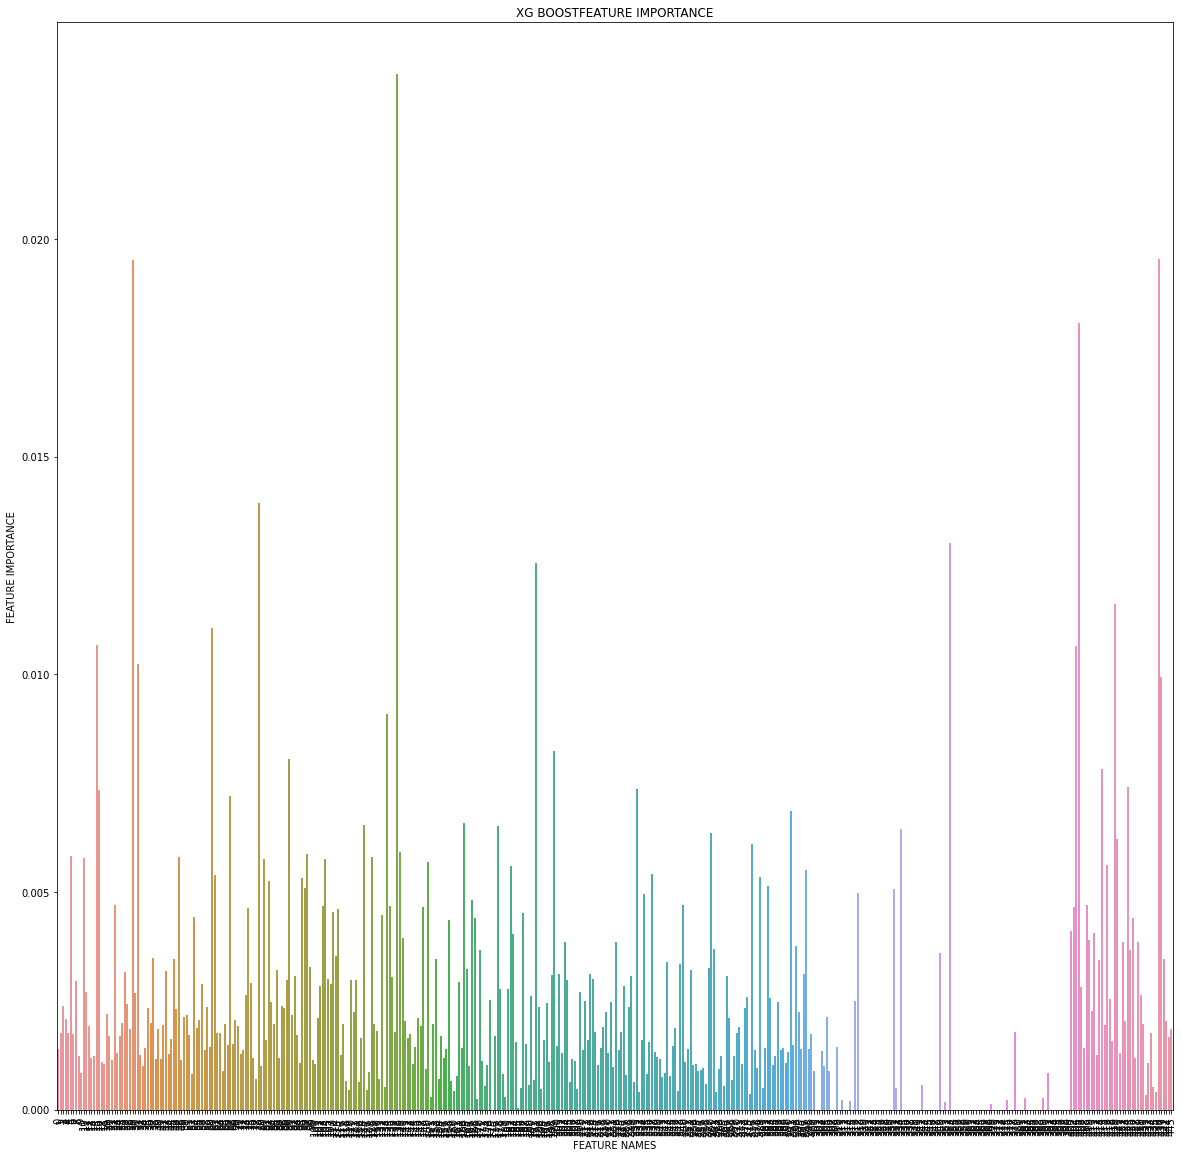

In [30]:
plot_feature_importance(xg_reg.feature_importances_,x_train_d2v_df.columns,'XG BOOST')

In [31]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00139
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00238
Feature: 3, Score: 0.00208
Feature: 4, Score: 0.00175
Feature: 5, Score: 0.00582
Feature: 6, Score: 0.00173
Feature: 7, Score: 0.00295
Feature: 8, Score: 0.00123
Feature: 9, Score: 0.00085
Feature: 10, Score: 0.00578
Feature: 11, Score: 0.00271
Feature: 12, Score: 0.00191
Feature: 13, Score: 0.00118
Feature: 14, Score: 0.00124
Feature: 15, Score: 0.01066
Feature: 16, Score: 0.00734
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00106
Feature: 19, Score: 0.00220
Feature: 20, Score: 0.00170
Feature: 21, Score: 0.00114
Feature: 22, Score: 0.00471
Feature: 23, Score: 0.00131
Feature: 24, Score: 0.00170
Feature: 25, Score: 0.00198
Feature: 26, Score: 0.00316
Feature: 27, Score: 0.00243
Feature: 28, Score: 0.00185
Feature: 29, Score: 0.01951
Feature: 30, Score: 0.00267
Feature: 31, Score: 0.01023
Feature: 32, Score: 0.00125
Feature: 33, Score: 0.00100
Feature: 34, Score: 0.00142
Feature: 35, Score: 0.00234
Fe

In [32]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### Random Forest

In [33]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_d2v_df, y_train_d2v_df)
y_pred_d2vec_rnd = rnd_clf.predict(x_test_d2v_df)

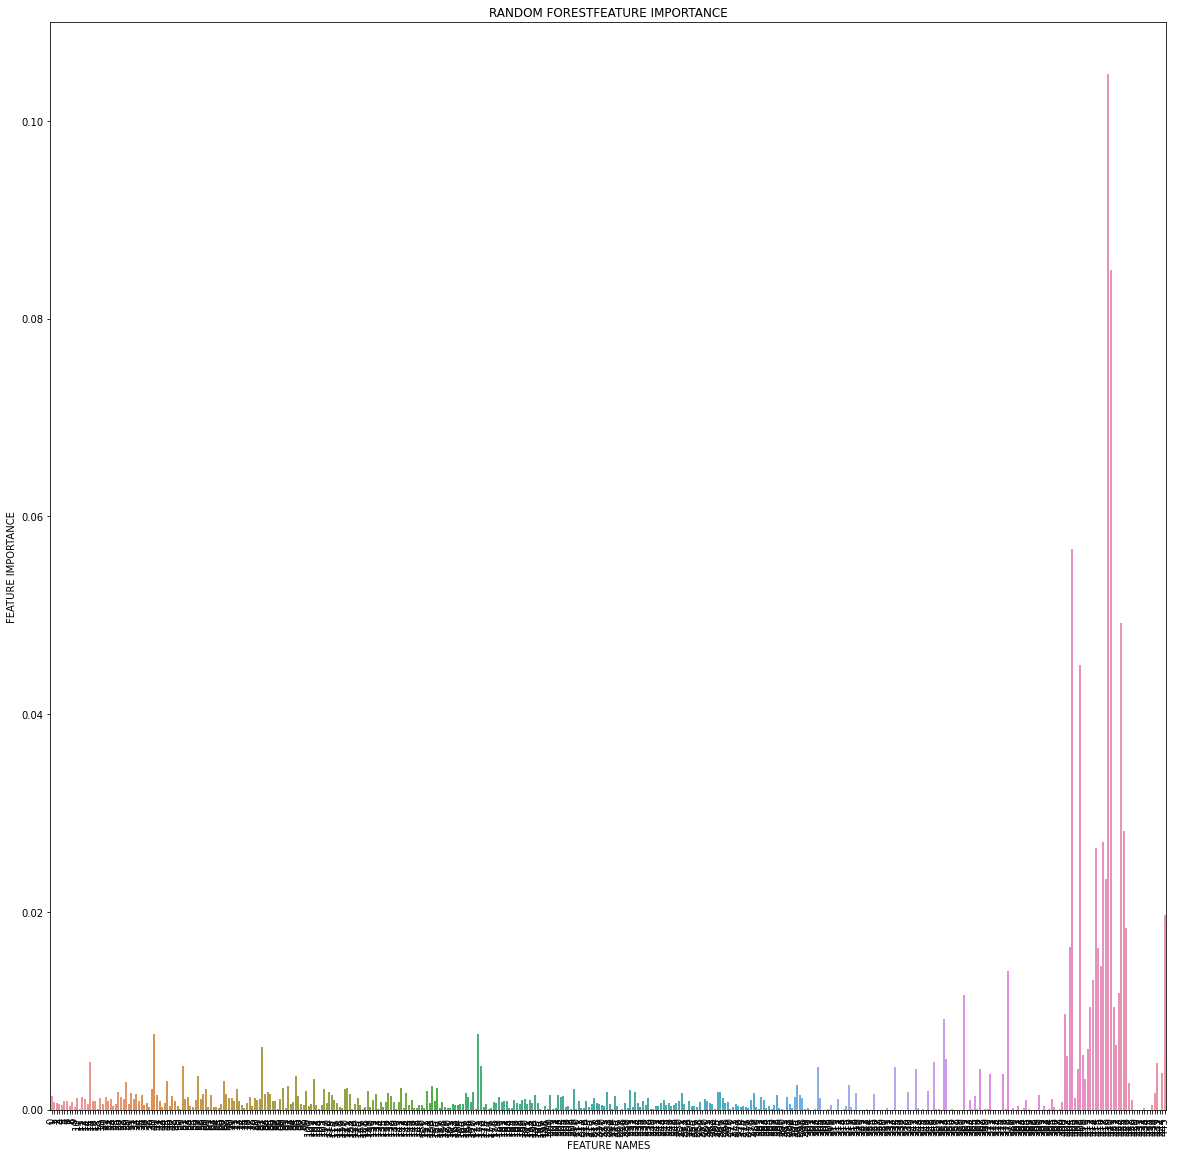

In [34]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_d2v_df.columns,'RANDOM FOREST')

In [35]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred_d2vec_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### MLP

In [36]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_d2v_df, y_train_d2v_df)
y_pred_d2vec_mlp = mlp_GS.predict(x_test_d2v_df)

In [37]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred_d2vec_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### SVR

In [38]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_d2v_df, y_train_d2v_df)
y_pred_w2vec_SVR = svr.predict(x_test_d2v_df)

In [39]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred_d2vec_mlp)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [40]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.009629,0.522325,0.001820,-4.642951,0.864437
1,XGboost,0.009472,0.537838,0.001472,-4.659458,0.889369
2,Random Forest,0.009653,0.520011,0.001690,-4.640534,0.866844
3,MLP,0.011841,0.277668,0.003542,-4.436174,0.960571
4,SVR,0.011841,0.277668,0.003542,-4.436174,0.960571
